# Семинар 1: знакомство с PyTorch

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

### План семинара:

1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**
2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
3. Работаем с градиентами руками
4. Моя первая нейросеть

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision

from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [73]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.56294974, 0.88155684, 0.79854555],
       [0.0093279 , 0.75888582, 0.49996652],
       [0.95025555, 0.4010685 , 0.53812044],
       [0.9649811 , 0.50991303, 0.24128111],
       [0.49078242, 0.41626515, 0.16490782]])

In [74]:
# размеры массива
a.shape

(5, 3)

In [75]:
# сложение
a + 5

array([[5.56294974, 5.88155684, 5.79854555],
       [5.0093279 , 5.75888582, 5.49996652],
       [5.95025555, 5.4010685 , 5.53812044],
       [5.9649811 , 5.50991303, 5.24128111],
       [5.49078242, 5.41626515, 5.16490782]])

In [76]:
# матричное умножение
a @ a.T

array([[1.73172986, 1.07349816, 1.31822448, 1.18542714, 0.77493363],
       [1.07349816, 0.82596122, 0.58227129, 0.51659949, 0.40292407],
       [1.31822448, 0.58227129, 1.35341516, 1.251327  , 0.72205983],
       [1.18542714, 0.51659949, 1.251327  , 1.2494164 , 0.72564393],
       [0.77493363, 0.40292407, 0.72205983, 0.72564393, 0.44133865]])

In [77]:
# среднее по колонкам
a.mean(axis=-1)

array([0.74768404, 0.42272675, 0.62981483, 0.57205842, 0.35731846])

In [78]:
# решейп
a.reshape(3, 5).shape

(3, 5)

#### Разминка

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [79]:
(np.arange(1, 10001, dtype=np.int64) ** 2).sum()

333383335000

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [80]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.8546, 0.9502, 0.8455],
        [0.8874, 0.3227, 0.8037],
        [0.5552, 0.1782, 0.2849],
        [0.8985, 0.9591, 0.0146],
        [0.1609, 0.8104, 0.9887]])

In [81]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [82]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [83]:
# сложение
x + 5

tensor([[5.8546, 5.9502, 5.8455],
        [5.8874, 5.3227, 5.8037],
        [5.5552, 5.1782, 5.2849],
        [5.8985, 5.9591, 5.0146],
        [5.1609, 5.8104, 5.9887]])

In [84]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[2.3481, 1.7445, 0.8846, 1.6916, 1.7435],
        [1.7445, 1.5375, 0.7791, 1.1185, 1.1989],
        [0.8846, 0.7791, 0.4211, 0.6739, 0.5154],
        [1.6916, 1.1185, 0.6739, 1.7275, 0.9363],
        [1.7435, 1.1989, 0.5154, 0.9363, 1.6601]])

In [85]:
# очередное матричное умножение
x.mm(x.t())

tensor([[2.3481, 1.7445, 0.8846, 1.6916, 1.7435],
        [1.7445, 1.5375, 0.7791, 1.1185, 1.1989],
        [0.8846, 0.7791, 0.4211, 0.6739, 0.5154],
        [1.6916, 1.1185, 0.6739, 1.7275, 0.9363],
        [1.7435, 1.1989, 0.5154, 0.9363, 1.6601]])

In [86]:
# поэлементное умножение
x * x

tensor([[7.3028e-01, 9.0297e-01, 7.1486e-01],
        [7.8744e-01, 1.0413e-01, 6.4590e-01],
        [3.0820e-01, 3.1755e-02, 8.1150e-02],
        [8.0733e-01, 9.1991e-01, 2.1300e-04],
        [2.5894e-02, 6.5678e-01, 9.7746e-01]])

In [87]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.8834, 0.6712, 0.3394, 0.6241, 0.6533])

In [88]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [89]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [90]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [91]:
torch.sum(torch.arange(1, 10001) ** 2).item()

333383335000

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [92]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[-7.4390e+00,  6.4320e-43, -7.4390e+00],
        [ 6.4320e-43, -7.4390e+00,  6.4320e-43],
        [-7.4390e+00,  6.4320e-43, -7.4390e+00],
        [ 6.4320e-43, -7.4390e+00,  6.4320e-43],
        [-7.4390e+00,  6.4320e-43, -7.4390e+00]])

In [93]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.2036, 0.4927, 0.6361],
        [0.6111, 0.6280, 0.7045],
        [0.1518, 0.5569, 0.9197],
        [0.0148, 0.9667, 0.4336],
        [0.1816, 0.9237, 0.0313]])

In [94]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [95]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [96]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [97]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[-2.4122, -0.2195, -1.4982],
        [ 0.1282,  0.5939, -0.6342],
        [ 0.5513, -0.8294, -0.3622],
        [ 0.5928, -0.1357,  0.3007],
        [ 0.0802,  0.5750, -0.5252]])

In [98]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [99]:
x

tensor([[0.7647, 0.1337, 0.1993],
        [0.0047, 0.9426, 0.8665],
        [0.8090, 0.8259, 0.3130],
        [0.7575, 0.2164, 0.0879],
        [0.9664, 0.0425, 0.8848]])

In [100]:
y

tensor([[0.4884, 0.0962, 0.2902],
        [0.1621, 0.8064, 0.9739],
        [0.5461, 0.7974, 0.6398],
        [0.0086, 0.5189, 0.1866],
        [0.8064, 0.2451, 0.8844]])

In [101]:
# сложение
x + y

tensor([[1.2532, 0.2299, 0.4895],
        [0.1668, 1.7489, 1.8403],
        [1.3551, 1.6234, 0.9528],
        [0.7661, 0.7353, 0.2745],
        [1.7729, 0.2876, 1.7692]])

In [102]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[1.2532, 0.2299, 0.4895],
        [0.1668, 1.7489, 1.8403],
        [1.3551, 1.6234, 0.9528],
        [0.7661, 0.7353, 0.2745],
        [1.7729, 0.2876, 1.7692]])

In [103]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[1.2532, 0.2299, 0.4895],
        [0.1668, 1.7489, 1.8403],
        [1.3551, 1.6234, 0.9528],
        [0.7661, 0.7353, 0.2745],
        [1.7729, 0.2876, 1.7692]])

In [104]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [105]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [106]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [107]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [108]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [109]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [110]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [111]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

In [112]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

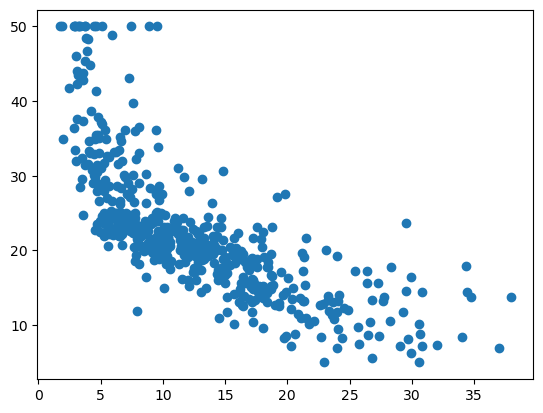

In [113]:
plt.scatter(data[:, -1], target);

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

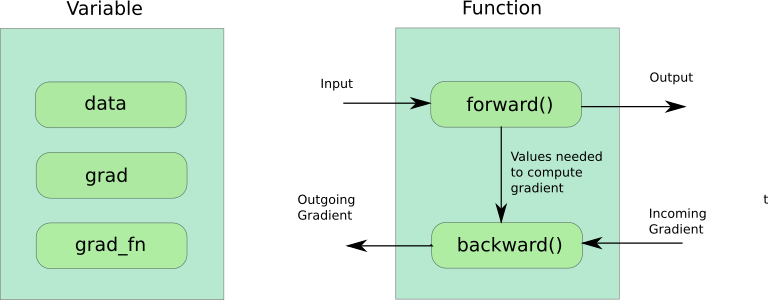

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [146]:
w = torch.rand(6, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = data[:, -1] / data[:, -1].max()
X = torch.tensor(np.array([x, x ** 2, x ** 3, x ** 4, x ** 5, x ** 6]).T, dtype=torch.float32)

y = torch.tensor(target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
# assert w.grad is None
# assert b.grad is None

In [147]:
x1.size(), y.size()

(torch.Size([5, 3]), torch.Size([506]))

In [148]:
y_pred = w @ X.T + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()

In [149]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-11.9071,  -4.4350,  -2.0887,  -1.1687,  -0.7426,  -0.5185])
dL/db = tensor([-43.6251])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [150]:
w.data, w.grad

(tensor([0.4250, 0.1534, 0.1038, 0.4476, 0.8790, 0.0919]),
 tensor([-11.9071,  -4.4350,  -2.0887,  -1.1687,  -0.7426,  -0.5185]))

In [151]:
w

tensor([0.4250, 0.1534, 0.1038, 0.4476, 0.8790, 0.0919], requires_grad=True)

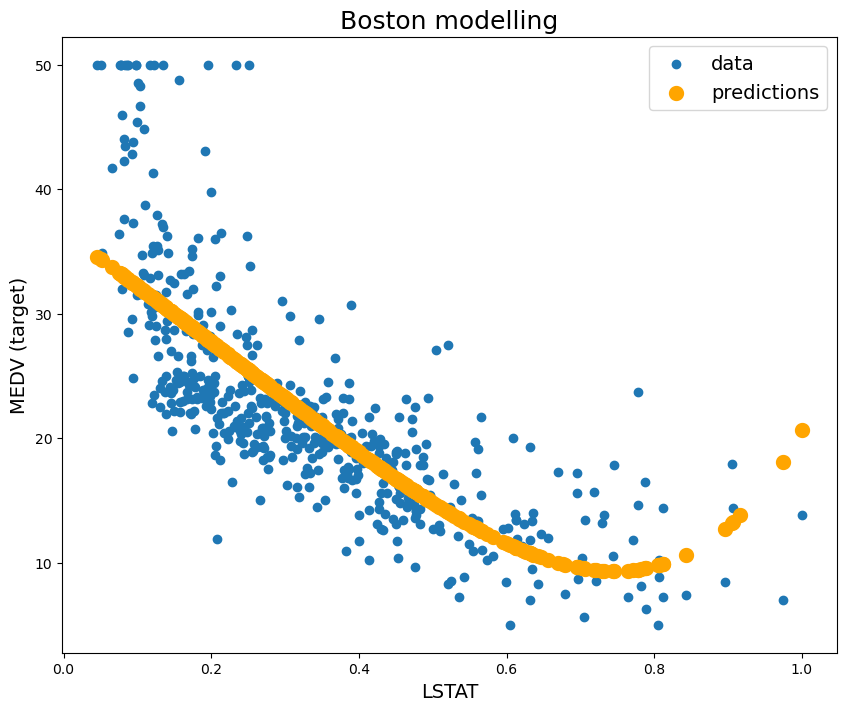

loss =  33.95116


In [153]:
from IPython.display import clear_output

for i in range(3000):
    y_pred = w @ X.T + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(X[:, 0].data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            X[:, 0].data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [156]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [157]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [158]:
our_dataset = RandomDataset(x, y)

In [159]:
our_dataset.__getitem__(1)

{'sample': tensor([0.3192, 0.2444, 0.4745, 0.3011, 0.8708]),
 'target': 0.9445530896126065}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [160]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [161]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.4583, 0.5296, 0.1999, 0.8814, 0.8501],
        [0.3192, 0.2444, 0.4745, 0.3011, 0.8708],
        [0.8890, 0.2965, 0.0762, 0.5877, 0.4053],
        [0.0899, 0.2281, 0.4446, 0.7088, 0.6635]])
Target:
tensor([0.9341, 0.9446, 0.9331, 0.6481], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [162]:
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 30)
)  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(30, 1)
)  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

In [163]:
y_pred = model(batch["sample"])  # получили предсказания модели

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [164]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

100%|██████████| 9912422/9912422 [00:05<00:00, 1795649.83it/s]


Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist/MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 1595906.59it/s]


Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1190084.66it/s]


Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist/MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



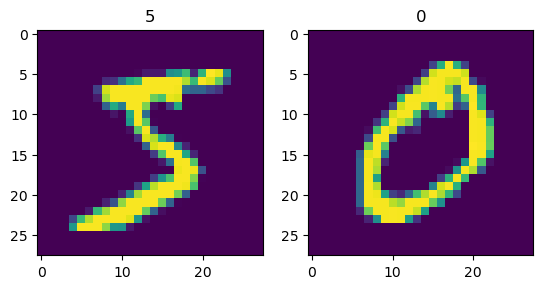

In [165]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [166]:
model = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(
        28 * 28, 128
    ),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(
        128, 10
    ),  # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц и выглядят так:

In [167]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[-0.0027, -0.0087,  0.0139,  ..., -0.0017,  0.0177,  0.0033],
          [-0.0228,  0.0113,  0.0090,  ..., -0.0061,  0.0169, -0.0258],
          [-0.0195, -0.0005, -0.0231,  ...,  0.0127,  0.0069, -0.0181],
          ...,
          [ 0.0340,  0.0222,  0.0299,  ..., -0.0116,  0.0309,  0.0286],
          [ 0.0132,  0.0129,  0.0334,  ..., -0.0173,  0.0239,  0.0056],
          [ 0.0048, -0.0192,  0.0093,  ..., -0.0192, -0.0113,  0.0253]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-2.1420e-02,  2.0401e-02, -1.5773e-02,  2.0787e-02, -2.0610e-02,
           1.8356e-02,  3.0137e-02,  2.8692e-02,  2.9158e-02, -2.4071e-02,
           2.8213e-02, -2.3126e-03,  3.0594e-03, -2.3939e-02, -8.0198e-05,
           5.3972e-03,  7.8294e-03,  1.4309e-03,  1.6172e-02,  1.4295e-02,
           4.7634e-03, -1.9507e-02, -3.2984e-02,  1.3018e-02, -1.7445e-02,
           3.4382e-02, -1.1120e-03, -2.7909e-02,  1.1342e-02, -2.2268e-0

Вместо того, чтобы каждый раз самим рисовать графики в `matplotlib`, мы будем _красиво_ трекать метрики в полуавтоматическом режиме в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся (это того стоит).

Note. Помимо этого инструмента есть другие альтернативы: Tensorboard (очень минималистичный, работает локально), MLFlow (менее красивый, но опенсорсный), Neptune (примерно как W&B).

In [169]:
# !pip install wandb --upgrade --quiet
import wandb

# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
wandb.login()
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

wandb: Currently logged in as: garkovski_dmitri (kuban23_). Use `wandb login --relogin` to force relogin


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [170]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        y_pred = model(x_train)  # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(
                val_dataloader
            ):  # берем батч из валидационного лоадера
                y_pred = model(x_val)  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())  # добавляем в массив
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist()
                )

        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log(
            {
                "mean val loss": np.mean(val_loss),
                "mean val accuracy": np.mean(val_accuracy),
            }
        )

        # печатаем метрики
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.1183769628405571, accuracy: 0.9623


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.08701175451278687, accuracy: 0.9744


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.09468063712120056, accuracy: 0.9743


### Дополнительные материалы:

* [Хорошая книга про pytorch](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)